# Marwa Boussaid Article : Forensic Anthropology Population Data- Mastoid - Tomography Scanners; X-Ray Computed- sex determination by skeleton

In [181]:
import platform
import sklearn
import scipy
import statsmodels
import matplotlib
import seaborn
import plotly
import notebook

print("Version de Jupyter Notebook:", notebook.__version__)
print("Version de Python:", platform.python_version())
print("Version de Scikit-learn:", sklearn.__version__)
print("Version de Scipy:", scipy.__version__)
print("Version de Statsmodels:", statsmodels.__version__)
print("Version de Matplotlib:", matplotlib.__version__)
print("Version de Seaborn:", seaborn.__version__)
print("Version de Plotly:", plotly.__version__)

Version de Jupyter Notebook: 6.5.4
Version de Python: 3.11.5
Version de Scikit-learn: 1.3.0
Version de Scipy: 1.11.1
Version de Statsmodels: 0.14.0
Version de Matplotlib: 3.7.2
Version de Seaborn: 0.12.2
Version de Plotly: 5.9.0


In [182]:
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Concordance Correlation Coefficient

In [183]:
#### importation de la base de donnée
df = pd.read_excel(r'gauche_droite.xlsx')

In [184]:
df.head()

,APd,APG,PMD,PMG,AMD,AMG,CMHD,CMHG,TMHD,TMHG,OSDMAXD,OSDMAXG,OCDMAXD,OCDMAXG,MVD,MVG,AIAD,AIAG,AGE,SEX
0,47.5,47.1,33.6,31.5,47.0,45.2,28.8,29.3,36.2,36.1,21.4,19.0,16.9,15.4,NaN,NaN,66.2,65.9,83,1
1,50.1,49.2,28.5,28.9,54.2,54.9,25.2,26.7,38.1,38.5,27.8,26.8,15.9,16.2,NaN,NaN,61.8,62.0,17,0
2,46.3,45.6,34.5,30.1,44.5,45.1,31.5,31.3,45.4,44.2,25.2,22.5,14.7,14.5,NaN,NaN,68.8,69.4,60,0
3,47.2,45.9,23.3,24.3,44.8,43.7,18.0,16.6,27.4,27.2,27.3,27.1,12.3,13.3,NaN,NaN,68.5,67.9,4,1
4,48.2,45.2,29.0,27.3,50.0,49.1,25.1,25.8,33.2,36.0,19.5,21.3,11.1,11.8,NaN,NaN,62.5,62.8,57,1


In [185]:
def concordance_correlation_coefficient(y_true, y_pred):
    """Concordance correlation coefficient."""
    # Raw data
    dct = {
        'y_true': y_true,
        'y_pred': y_pred
    }
    df = pd.DataFrame(dct)
    # Remove NaNs
    df = df.dropna()
    # Pearson product-moment correlation coefficients
    y_true = df['y_true']
    y_pred = df['y_pred']
    cor = np.corrcoef(y_true, y_pred)[0][1]
    # Means
    mean_true = np.mean(y_true)
    mean_pred = np.mean(y_pred)
    # Population variances
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    # Population standard deviations
    sd_true = np.std(y_true)
    sd_pred = np.std(y_pred)
    # Calculate CCC
    numerator = 2 * cor * sd_true * sd_pred
    denominator = var_true + var_pred + (mean_true - mean_pred)**2

    return numerator / denominator

In [186]:
concordance_correlation_coefficient(df['APd'], df['APG'])

0.9414067016750818

In [187]:
concordance_correlation_coefficient(df['PMD'], df['PMG'])

0.9620881029510365

In [188]:
concordance_correlation_coefficient(df['AMD'], df['AMG'])

0.9749999183409496

In [189]:
concordance_correlation_coefficient(df['CMHD'], df['CMHG'])

0.9754254692736823

In [190]:
concordance_correlation_coefficient(df['TMHD'], df['TMHG'])

0.9671285742339251

In [191]:
concordance_correlation_coefficient(df['OSDMAXD'], df['OSDMAXG'])

0.9674053545632115

In [192]:
concordance_correlation_coefficient(df['OCDMAXD'], df['OCDMAXG'])

0.9688286701532963

In [193]:
concordance_correlation_coefficient(df['AIAD'], df['AIAG'])

0.9666831050014489

## Descriptive analysis

In [194]:
#### importation de la base de donnée
df = pd.read_excel(r'data.xlsx')

In [195]:
df = df[df['age'] >= 18]
df = df.drop(['Filenumber', 'age','filter_$'], axis=1)

In [196]:
df.head()

,sex,AP,PM,AM,CMH,TMH,OSDMAX,OCDMAX,AIA,MV
0,0,48.0,35.5,37.5,32.2,43.7,35.8,26.7,69.0,21720.96264
1,1,44.1,27.1,45.4,25.3,31.5,27.5,18.4,68.9,8288.28000
4,1,50.2,27.6,49.8,28.0,34.0,23.9,13.7,65.0,5788.96240
5,0,54.4,33.4,64.1,34.0,48.3,31.0,18.8,57.0,14637.60480
6,0,46.6,31.0,55.8,34.3,40.9,28.9,20.5,54.3,12600.22660


In [197]:
X = df.drop('sex', axis=1)  # X contient toutes les colonnes sauf 'SEX'
varibale_to_analyse = X.columns.tolist()
varibale_to_analyse

['AP', 'PM', 'AM', 'CMH', 'TMH', 'OSDMAX', 'OCDMAX', 'AIA', 'MV']

In [198]:
df['sex']= df['sex'].replace({0:'male', 1:'female'})

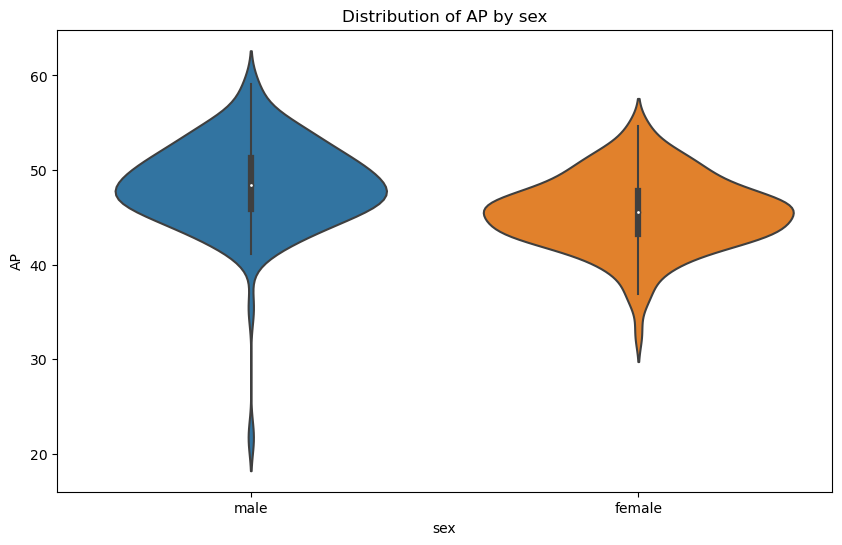

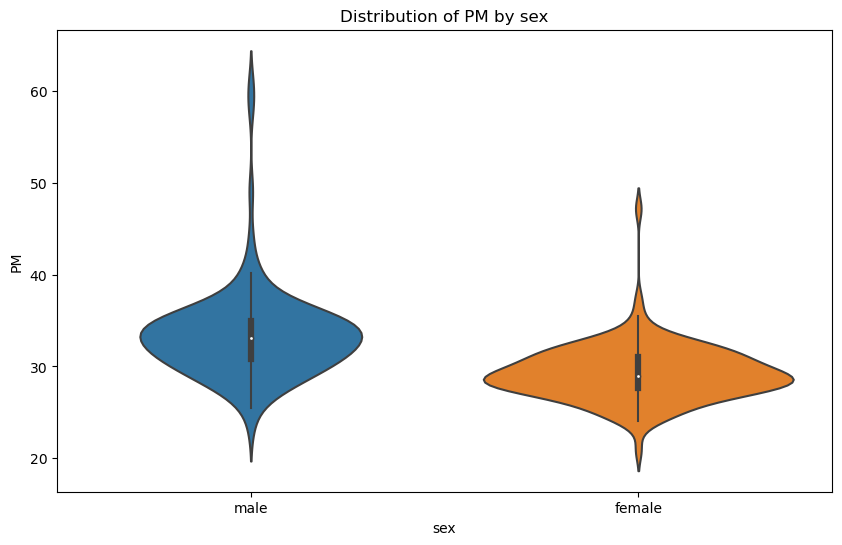

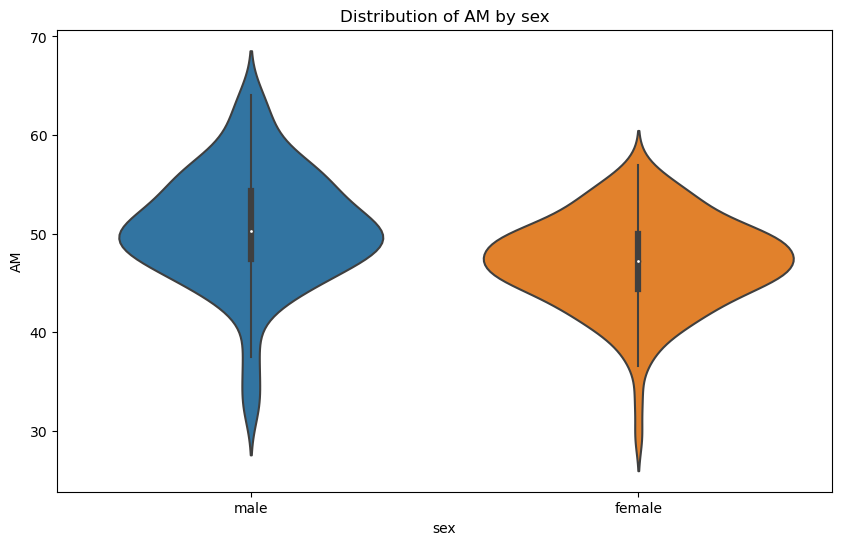

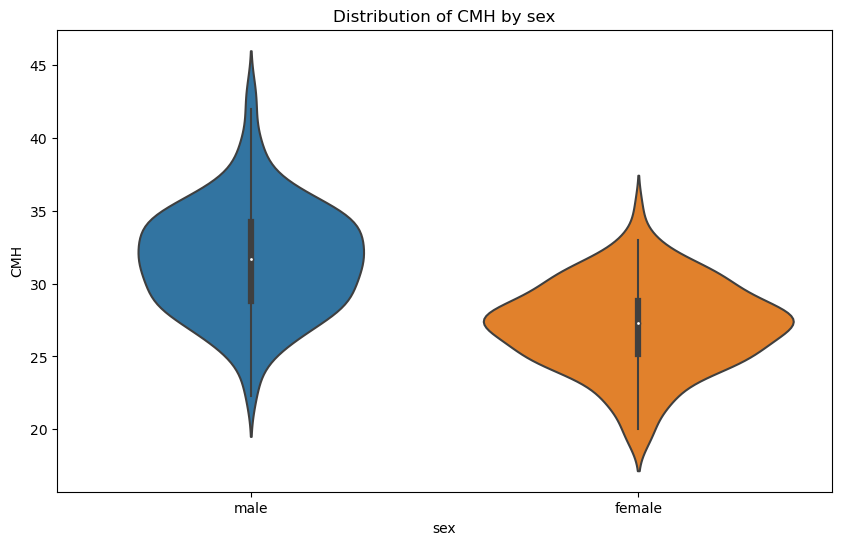

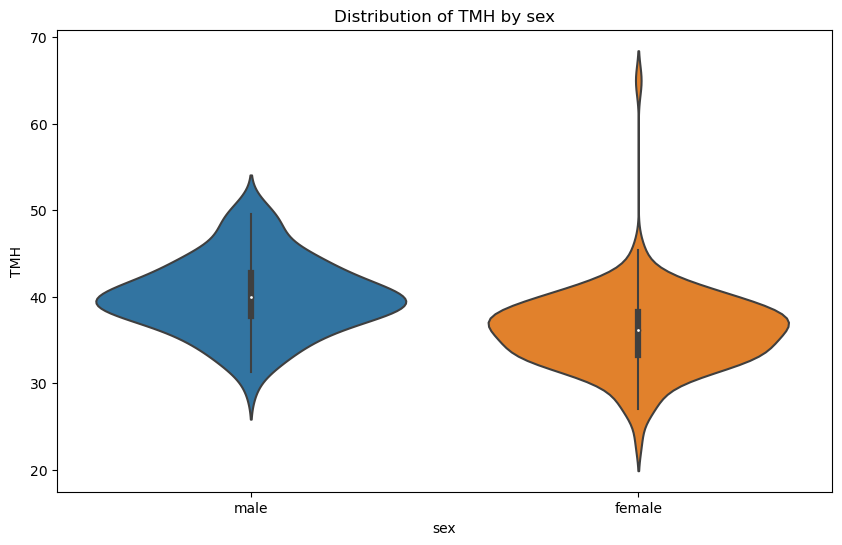

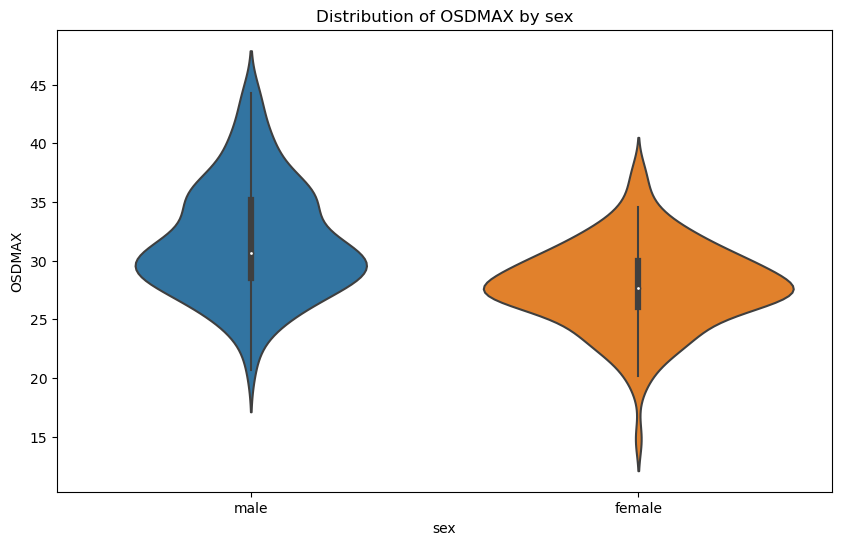

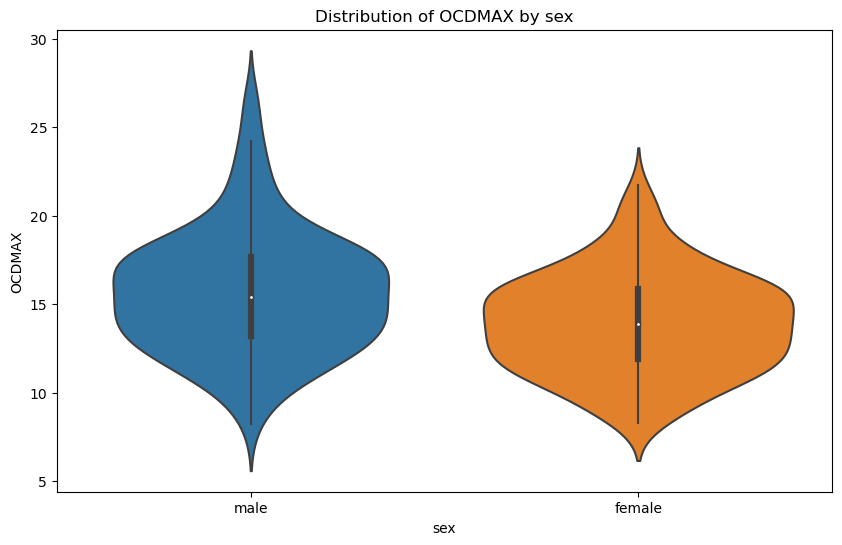

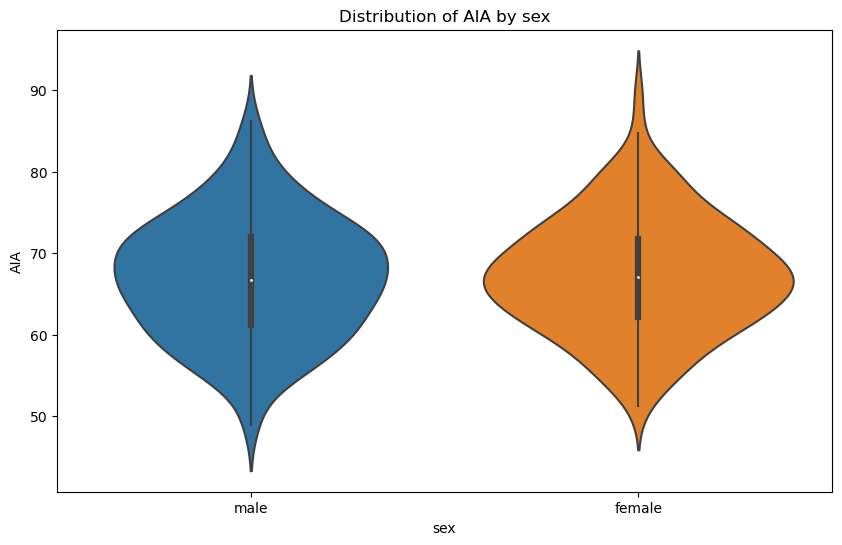

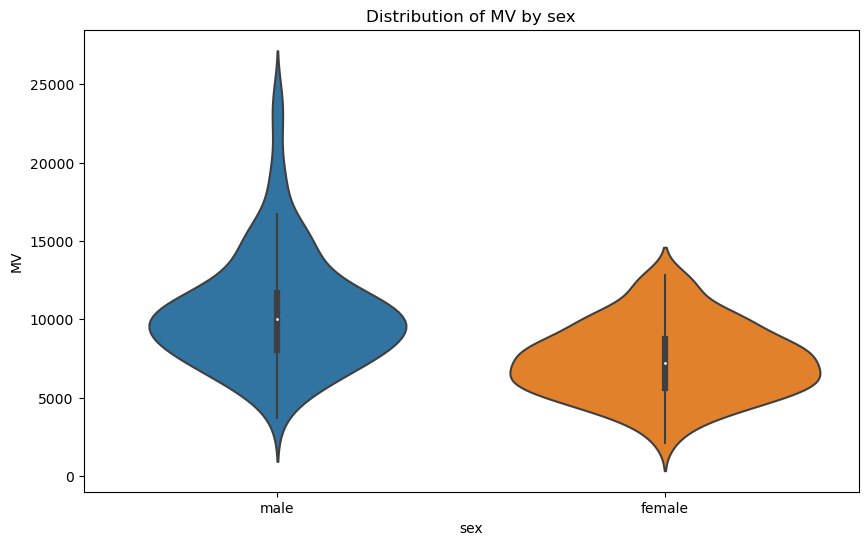

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nom de la variable catégorique cible
target_variable = 'sex'

# Liste des valeurs uniques dans la variable cible
unique_categories = df[target_variable].unique()

# Créer un sns.violinplot pour chaque variable numérique
for variable_to_analyse in varibale_to_analyse:
    plt.figure(figsize=(10, 6))

    sns.violinplot(x=target_variable, y=variable_to_analyse, data=df)

    # Ajouter des labels et un titre
    plt.xlabel(target_variable)
    plt.ylabel(variable_to_analyse)
    plt.title(f'Distribution of {variable_to_analyse} by {target_variable}')

    plt.show()


In [200]:
variables_to_analyze = ['AP', 'PM', 'AM', 'CMH', 'TMH', 'OSDMAX', 'OCDMAX', 'AIA']

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display, display_html
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

df_subset = df[variables_to_analyze].copy()

for var in df_subset.columns:
    df_subset[var] = scaler.fit_transform(df_subset[var].values.reshape(-1, 1))

# Remplacer les valeurs manquantes par 0 et les valeurs infinies par np.finfo(float).max
df_subset.replace([np.inf, -np.inf], np.finfo(float).max, inplace=True)
df_subset.fillna(0, inplace=True)


# Calculer le VIF pour chaque feature
vif_data = pd.DataFrame()
vif_data["feature"] = df_subset.columns
vif_data["VIF"] = [variance_inflation_factor(df_subset.values, i)
                   for i in range(len(df_subset.columns))]

# Trier les valeurs VIF par ordre croissant
vif_data = vif_data.sort_values(by="VIF", ascending=False)
# Calculate the correlation matrix
corr_matrix = df[variables_to_analyze].corr()
# Créez une copie de la matrice de corrélation en valeurs absolues

abs_corr_matrix = corr_matrix.abs()
# Créez une liste vide pour stocker les paires de variables corrélées
high_corr_pairs = []    

# Parcourez les paires de variables dans la matrice de corrélation
for i in range(len(abs_corr_matrix.columns)):
    for j in range(i):
        if abs_corr_matrix.iloc[i, j] > 0.6:
            variable1 = abs_corr_matrix.columns[i]
            variable2 = abs_corr_matrix.columns[j]
            correlation = abs_corr_matrix.iloc[i, j]
            high_corr_pairs.append((variable1, variable2, correlation))

# Triez la liste des paires de variables en fonction de leur corrélation absolue
high_corr_pairs.sort(key=lambda x: x[2], reverse=True)
corr_df = pd.DataFrame(high_corr_pairs, columns=["Variable 1", "Variable 2", "Correlation > 0.6"])

vif_data = vif_data.style.set_table_attributes("style='display:inline'").set_caption('VIF')
corr_df = corr_df.style.set_table_attributes("style='display:inline'").set_caption('CORR')
space = "\xa0" * 10
display_html(vif_data._repr_html_()+space+corr_df._repr_html_(), raw=True)

VIF 
 
 
   
 feature 
 VIF 
 
 
 
 
 3 
 CMH 
 4.155058 
 
 
 1 
 PM 
 3.557626 
 
 
 2 
 AM 
 2.150530 
 
 
 4 
 TMH 
 1.886489 
 
 
 0 
 AP 
 1.603124 
 
 
 5 
 OSDMAX 
 1.303345 
 
 
 6 
 OCDMAX 
 1.281327 
 
 
 7 
 AIA 
 1.145585 
 
 
 
          
 
 CORR 
 
 
   
 Variable 1 
 Variable 2 
 Correlation > 0.6 
 
 
 
 
 0 
 CMH 
 PM 
 0.792074 
 
 
 1 
 TMH 
 CMH 
 0.618768

# Univariate and Multivariate Analysis

In [202]:
df['sex']= df['sex'].replace({'male':1, 'female':0})

In [203]:
import statsmodels.api as sm


# Liste pour stocker les noms des variables significatives
significant_vars = []

# Crée un DataFrame vide pour stocker les résultats
result_df = pd.DataFrame(columns=["OR", "Lower CI", "Upper CI", "p_value"])
# Boucle pour ajuster des modèles univariés et afficher leurs résumés
for col in variables_to_analyze: 
    try:
        x_univariate = sm.add_constant(df[col])

        model_univariate = sm.Logit(df['sex'], x_univariate, missing='drop').fit(disp=0)


        univariate_result = pd.DataFrame(
        {
            "OR": np.exp(model_univariate.params).apply(lambda x: f'{x:.3f}'),
            "Lower CI": np.exp(model_univariate.conf_int()[0]).apply(lambda x: f'{x:.3f}'),
            "Upper CI": np.exp(model_univariate.conf_int())[1].apply(lambda x: f'{x:.3f}'),  
            "p_value": model_univariate.pvalues[1].round(3)
        }, index=[col] 
        )
        #odds_ratios = np.exp(odds_ratios)
        #print(univariate_result[1:])
        result_df = pd.concat([result_df, univariate_result])


        #print(f"Univariate Analysis for {col}:\n", model_univariate.summary())

        if model_univariate.pvalues[col] < 0.2:
            significant_vars.append(col)
    except Exception as e:
        print(f"univariate Error occurred for variable {col}: {e}")

#display(result_df)
try:

    #print('significant_vars: ',significant_vars)
    # Ajuster le modèle multivarié avec les variables significatives seulement
    x_multivariate = sm.add_constant(df[significant_vars])
    model_multivariate = sm.Logit(df['sex'], x_multivariate, missing='drop').fit(disp=0)
    # afficher tableau resumé: 
    multivariate_result = pd.DataFrame(
    {
        "OR": np.exp(model_multivariate.params).apply(lambda x: f'{x:.3f}'),
        "Lower CI": np.exp(model_multivariate.conf_int())[0].apply(lambda x: f'{x:.3f}'),
        "Upper CI": np.exp(model_multivariate.conf_int())[1].apply(lambda x: f'{x:.3f}'),     
        "p_value":model_multivariate.pvalues.round(3)
    }
    )

    # Concaténer les DataFrames result_df et multivariate_result horizontalement
    combined_results = pd.concat([result_df, multivariate_result], axis=1)
    combined_results.columns = pd.MultiIndex.from_tuples(
[("Univariate Analysis", col) for col in result_df.columns] + [("Multivariate Analysis", col) for col in multivariate_result.columns]
                )
    combined_results = combined_results.fillna('')

    styled_results = combined_results.style.set_properties(**{'text-align': 'center'})

    styled_results = styled_results.set_table_styles(
            [dict(selector = 'th', props=[('text-align', 'center')])])

    # Afficher le tableau résultant
    display(styled_results)

    selected_vars = multivariate_result.index[multivariate_result['p_value'] < 0.05].tolist()
    selected_vars = [var for var in selected_vars if var != 'const']

except Exception as e:
        print(f" mutlivariate Error occurred for variable {col}: {e}")

# SequentialFeatureSelector "Forward"

In [204]:
#from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
# Supposons que variables_to_analyze soit votre liste de variables indépendantes
X = df[significant_vars]
y = df['sex']

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez une instance de SequentialFeatureSelector
sfs = SequentialFeatureSelector(LogisticRegression(),
                                n_features_to_select='auto',
                                direction = 'forward',
                                scoring='roc_auc',
                                cv=5)

# Appliquez SequentialFeatureSelector sur les données d'entraînement
sfs.fit(X, y)

# Obtenez les indices des caractéristiques sélectionnées
selected_feature_indices = list(sfs.get_support())

# Obtenez les noms des caractéristiques sélectionnées
selected_features = X.columns[selected_feature_indices]
print("Selected Variables by SequentialFeatureSelector :", selected_features)


Selected Variables by SequentialFeatureSelector : Index(['AP', 'CMH', 'OSDMAX'], dtype='object')


# Final Model

les variables significatives sont:  ['AP', 'CMH', 'OSDMAX']
Confusion Matrix:
[[27  6]
 [ 4 15]]
Accuracy :  0.808
Sensitivity : 0.789
Specificity :  0.818
ROC AUC Score: 0.91
Coefficients: [0.11933241 0.3494682  0.16898902]
Intercept: -20.718535759763355


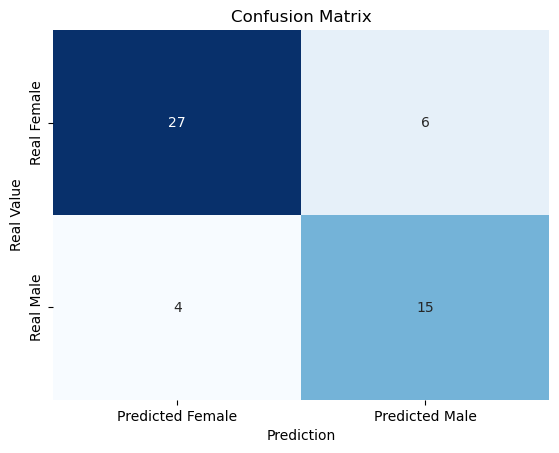

optimal_threshold  0.7343314289847446


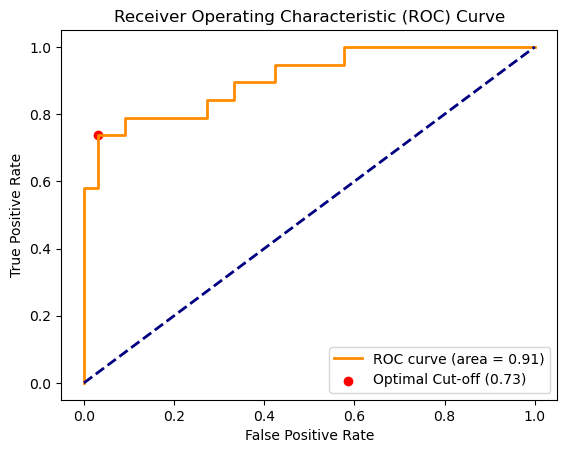

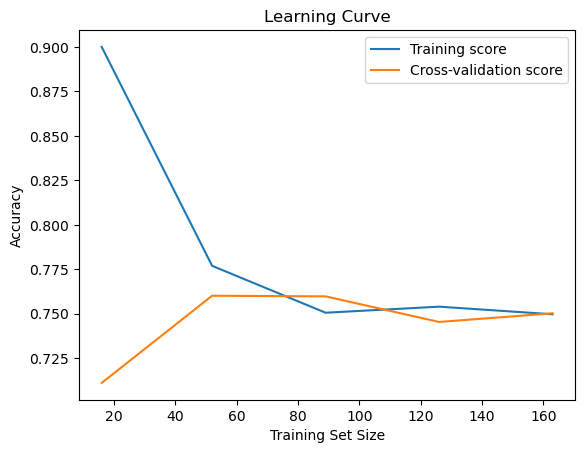

Cross-Validation Scores: [0.75609756 0.73170732 0.75609756 0.70731707 0.8       ]
Mean CV Score: 0.750


In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc,classification_report, accuracy_score, recall_score, precision_score
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.metrics import recall_score, make_scorer
from roc_utils import compute_roc


# Sélectionner les variables avec p_value < 0.05 de l'analyse multivariée
selected_variables = selected_vars
print("les variables significatives sont: ", selected_variables)
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df[selected_variables], df['sex'], test_size=0.2, random_state=42)


# Construire et ajuster le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtenir les coefficients et l'intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer les métriques
#r2_score = model.score(X_test, y_test)
confusion_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
#sensibilité
#recall = recall_score(y_test, y_pred)
# Récupération des valeurs de la matrice de confusion
TN = confusion_mat[0, 0]  # True Negatives
FP = confusion_mat[0, 1]  # False Positives
TP = confusion_mat[1, 1]
FN = confusion_mat[1, 0]

Sensitivity  = TP / ( TP + FN )
# Calcul de la spécificité
specificity = TN / (TN + FP)

# Calculer ROC AUC Score avec les probabilités positives
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Afficher les résultats
# print(f"R² Score: {r2_score:.3f}")
print("Confusion Matrix:")
print(confusion_mat)

 # Calcul de l'exactitude
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : ', accuracy.round(3))

# Calcul de la Sensitivity   =  recall !!!
print('Sensitivity :', Sensitivity.round(3))

# Calcul de la spécificité
print('Specificity : ', specificity.round(3))

print(f"ROC AUC Score: {roc_auc:.2f}")
# Afficher les coefficients et l'intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Female", "Predicted Male"],
            yticklabels=["Real Female", "Real Male"])
plt.xlabel("Prediction")
plt.ylabel("Real Value")
plt.title("Confusion Matrix")
plt.show()

# Afficher la courbe ROC
fpr, tpr, thresholds  = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_curve = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_curve))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Ajouter le point de coupure
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('optimal_threshold ',optimal_threshold)
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Cut-off ({optimal_threshold:.2f})')
plt.legend()
plt.show()


# Afficher la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')  # Ajoutez cette ligne pour inclure la légende
plt.show()

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores:", cv_scores)
print(f"Mean CV Score: {np.mean(cv_scores):.3f}")


In [209]:
import joblib

# Sauvegarder le modèle
joblib.dump(model, 'model.joblib')

['model.joblib']

In [211]:
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/DrKenani/marwa_boussaid.git
!git push -u origin main


Initialized empty Git repository in C:/Users/Asus PC/AAA IA/Machine Learning/these/these_marwa_boussaid/.git/


fatal: pathspec 'README.md' did not match any files


On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Concordance Correlation Coefficient.docx
	Concordance_Correlation.ipynb
	analyse_marwa_1.ipynb
	complete_data_analysis.ipynb
	cuttoffpoint.docx
	data.xlsx
	gauche_droite.xlsx
	graphique_displot.html
	graphique_displot.ipynb
	learnign curve.png
	learning curve.png
	marwa_article.docx
	marwa_results.docx
	matrix.png
	model.joblib
	roc.png
	roc2.png

nothing added to commit but untracked files present (use "git add" to track)


error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/DrKenani/marwa_boussaid.git'
